```
Name: Neha Upadhye
Student ID: 1002232340
```


In [41]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score

In [42]:
# Step 2: Load the dataset
file_path = '/content/dataset_KNN.csv'
df = pd.read_csv(file_path)

In [43]:
#Making a copy of orginial Data
df_original = df.copy()

In [44]:
# Step 2.1: Dataset Information (Size, Shape, NaN values)
print("Dataset Shape:", df.shape)  # Prints the number of rows and columns

Dataset Shape: (768, 9)


In [45]:
print("Dataset Size:", df.size)    # Total number of elements in the dataset

Dataset Size: 6912


In [46]:
print("Dataset Info:", df.info())                   # Provides information about each column (non-null count, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
Dataset Info: None


**`Checking Missing Values`**

In [47]:
nan_present = df.isna().any()
print(nan_present)

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [48]:
print("Missing Values (NaN) in each column:\n", df.isna().sum())  # Show count of missing (NaN) values per column

Missing Values (NaN) in each column:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [49]:
# Check skewness for all columns
skewness_all = df.skew()
print(skewness_all)

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


Glucose: 0.530989 (moderately skewed) - Consider median.
BloodPressure: 0.134153 (approximately symmetric) - Mean can be used.
SkinThickness: 0.690619 (moderately skewed) - Consider median.
Insulin: 2.166464 (highly skewed) - Use median.
BMI: 0.593970 (moderately skewed) - Consider median

**Imputing the Missing Values**

In [50]:
# Count the number of NaN occurrences in the 'Glucose' column
nan_glucose_count = df['Glucose'].isna().sum()

# Display the result
print("Number of NaN values in the 'Glucose' column:", nan_glucose_count)

# Check skewness for specific columns
skewness_glucose = df['Glucose'].skew()
print(f'Skewness of Glucose: {skewness_glucose}')

# Perform median imputation on the 'Glucose' column
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
print("Successful Median Imputaion")

# Check for NaN values in the Glucose column after imputation
nan_count_glucose = df['Glucose'].isna().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'Glucose' column after imputation: {nan_count_glucose}")

Number of NaN values in the 'Glucose' column: 5
Skewness of Glucose: 0.5309885349396285
Successful Median Imputaion
Number of NaN values in 'Glucose' column after imputation: 0


In [51]:
# Check skewness and outliers
#df['BloodPressure'].plot(kind='box', title='Boxplot for BP')

# Count the number of NaN occurrences in the 'BP' column
nan_bp_count = df['BloodPressure'].isna().sum()
# Display the result
print("Number of NaN values in the 'BloodPressure' column:", nan_bp_count)

# Check skewness for specific column
skewness_bp = df['BloodPressure'].skew()
print(f'Skewness of BloodPressure: {skewness_bp}')

# Perform mean imputation on the 'BP' column
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
print("Successful Mean Imputaion")

# Check for NaN values in the BP column after imputation
nan_count_bp = df['BloodPressure'].isna().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'BloodPressure' column after imputation: {nan_count_bp}")

Number of NaN values in the 'BloodPressure' column: 35
Skewness of BloodPressure: 0.13415273171959252
Successful Mean Imputaion
Number of NaN values in 'BloodPressure' column after imputation: 0


In [52]:
# Check skewness and outliers
#df['SkinThickness'].plot(kind='box', title='Boxplot for Skin Thickness')

# Count the number of NaN occurrences in the 'SkinThickness' column
nan_sk_count = df['SkinThickness'].isna().sum()

# Display the result
print("Number of NaN values in the 'SkinThickness' column:", nan_sk_count)

# Check skewness for specific column
skewness_sk = df['SkinThickness'].skew()
print(f'Skewness of SkinThickness: {skewness_sk}')

# Perform median imputation on the 'SK' column
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
print("Successful Median Imputaion")

# Check for NaN values in the SK column after imputation
nan_count_sk = df['SkinThickness'].isna().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'SkinThickness' column after imputation: {nan_count_sk}")

Number of NaN values in the 'SkinThickness' column: 227
Skewness of SkinThickness: 0.690619013984192
Successful Median Imputaion
Number of NaN values in 'SkinThickness' column after imputation: 0


In [53]:
# Check skewness and outliers
#df['Insulin'].plot(kind='box', title='Boxplot for Insulin')

# Count the number of NaN occurrences in the 'Insulin' column
nan_insulin_count = df['Insulin'].isna().sum()

# Display the result
print("Number of NaN values in the 'Insulin' column:", nan_insulin_count)

# Check skewness for specific column
skewness_insulin = df['Insulin'].skew()
print(f'Skewness of Insulin: {skewness_insulin}')

# Perform median imputation on the 'Insulin' column
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
print("Successful Median Imputaion")

# Check for NaN values in the Insulin column after imputation
nan_count_insulin = df['Insulin'].isna().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'Insulin' column after imputation: {nan_count_insulin}")

Number of NaN values in the 'Insulin' column: 374
Skewness of Insulin: 2.166463843812443
Successful Median Imputaion
Number of NaN values in 'Insulin' column after imputation: 0


In [54]:
# Check skewness and outliers
#df['BMI'].plot(kind='box', title='Boxplot for BMI')

# Count the number of NaN occurrences in the 'BMI' column
nan_bmi_count = df['BMI'].isna().sum()

# Display the result
print("Number of NaN values in the 'BMI' column:", nan_bmi_count)

# Check skewness for specific column
skewness_bmi = df['BMI'].skew()
print(f'Skewness of BMI: {skewness_bmi}')

# Perform median imputation on the 'BMI' column
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
print("Successful Median Imputaion")

# Check for NaN values in the BMI column after imputation
nan_count_bmi = df['BMI'].isna().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'BMI' column after imputation: {nan_count_bmi}")

Number of NaN values in the 'BMI' column: 11
Skewness of BMI: 0.5939697505712673
Successful Median Imputaion
Number of NaN values in 'BMI' column after imputation: 0


In [55]:
nan_present = df.isna().any()
print(nan_present)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


**`Outliers`**

Number of outliers in the 'Pregnancies' column: 4


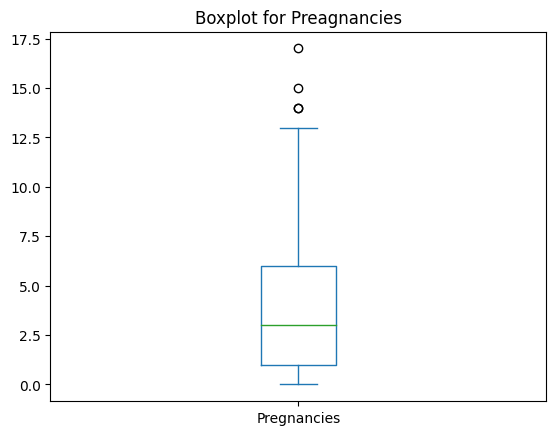

In [56]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'Pregnancies' column
df['Pregnancies'].plot(kind='box', title='Boxplot for Preagnancies')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'Pregnancies' column: {num_outliers}")

In [57]:
# Calculate the mean of the 'Pregnancies' column
mean_pregnancies = df['Pregnancies'].mean()

# Replace outliers in the 'Pregnancies' column with the mean
df['Pregnancies'] = df['Pregnancies'].where((df['Pregnancies'] >= lower_bound) & (df['Pregnancies'] <= upper_bound), mean_pregnancies)

# Check if outliers have been replaced
remaining_outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]
print(f"Number of remaining outliers in the 'Pregnancies' column: {remaining_outliers.shape[0]}")

Number of remaining outliers in the 'Pregnancies' column: 0


Number of outliers in the 'Glucose' column: 0


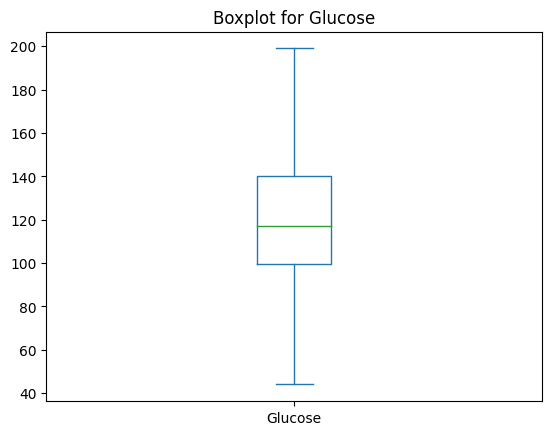

In [58]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Glucose'] < lower_bound) | (df['Glucose'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'Glucose' column
df['Glucose'].plot(kind='box', title='Boxplot for Glucose')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'Glucose' column: {num_outliers}")

Since the number of outliers is zero, we dont process further

Number of outliers in the 'BloodPressure' column: 14


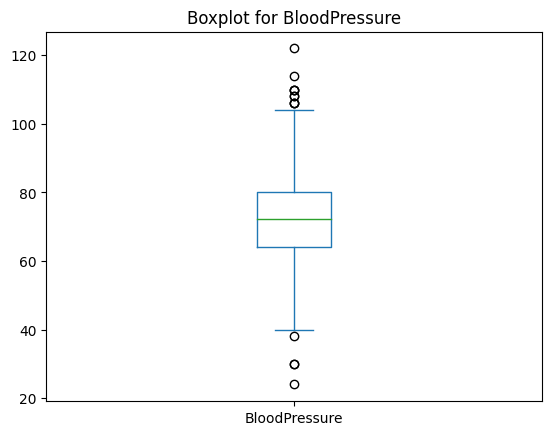

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['BloodPressure'] < lower_bound) | (df['BloodPressure'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'BP' column
df['BloodPressure'].plot(kind='box', title='Boxplot for BloodPressure')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'BloodPressure' column: {num_outliers}")

In [60]:
# Calculate mean
mean_value = df['BloodPressure'][(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)].mean()

# Replace outliers with mean
df['BloodPressure'] = np.where((df['BloodPressure'] < lower_bound) | (df['BloodPressure'] > upper_bound), mean_value, df['BloodPressure'])

# Check if outliers have been replaced
remaining_outliers = df[(df['BloodPressure'] < lower_bound) | (df['BloodPressure'] > upper_bound)]
print(f"Number of remaining outliers in the 'BloodPressure' column: {remaining_outliers.shape[0]}")


Number of remaining outliers in the 'BloodPressure' column: 0


Number of outliers in the 'SkinThickness' column: 87


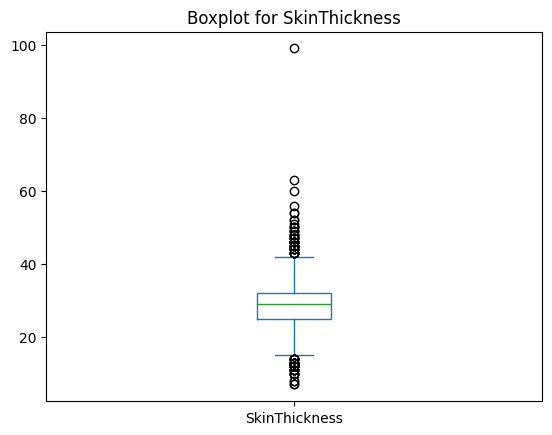

In [61]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['SkinThickness'] < lower_bound) | (df['SkinThickness'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'SkinThickness' column
df['SkinThickness'].plot(kind='box', title='Boxplot for SkinThickness')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'SkinThickness' column: {num_outliers}")

In [62]:
# Calculate the median of the 'SkinThickness' column
median_skin_thickness = df['SkinThickness'].median()

# Replace outliers in the 'SkinThickness' column with the median
df['SkinThickness'] = df['SkinThickness'].where((df['SkinThickness'] >= lower_bound) & (df['SkinThickness'] <= upper_bound), median_skin_thickness)

# Check if outliers have been replaced
remaining_outliers = df[(df['SkinThickness'] < lower_bound) | (df['SkinThickness'] > upper_bound)]
print(f"Number of remaining outliers in the 'SkinThickness' column: {remaining_outliers.shape[0]}")

Number of remaining outliers in the 'SkinThickness' column: 0


Number of outliers in the 'Insulin' column: 346


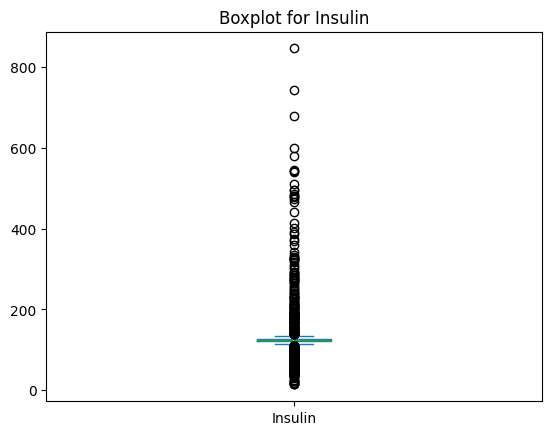

In [63]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'Insulin' column
df['Insulin'].plot(kind='box', title='Boxplot for Insulin')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'Insulin' column: {num_outliers}")

In [64]:
# Calculate the median of the 'Insulin' column
median_insulin = df['Insulin'].median()

# Replace outliers in the 'Insulin' column with the median
df['Insulin'] = df['Insulin'].where((df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound), median_insulin)

# Check if outliers have been replaced
remaining_outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]
print(f"Number of remaining outliers in the 'Insulin' column: {remaining_outliers.shape[0]}")

Number of remaining outliers in the 'Insulin' column: 0


Number of outliers in the 'BMI' column: 8


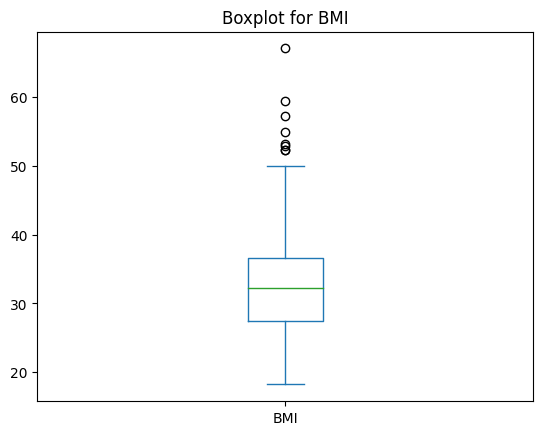

In [65]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Display the outliers by creating a boxplot for the 'BMI' column
df['BMI'].plot(kind='box', title='Boxplot for BMI')

num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'BMI' column: {num_outliers}")

In [66]:
# Calculate the median of the 'BMI' column
median_bmi = df['BMI'].median()

# Replace outliers in the 'BMI' column with the median
df['BMI'] = df['BMI'].where((df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound), median_bmi)

# Check if outliers have been replaced
remaining_outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"Number of remaining outliers in the 'BMI' column: {remaining_outliers.shape[0]}")

Number of remaining outliers in the 'BMI' column: 0


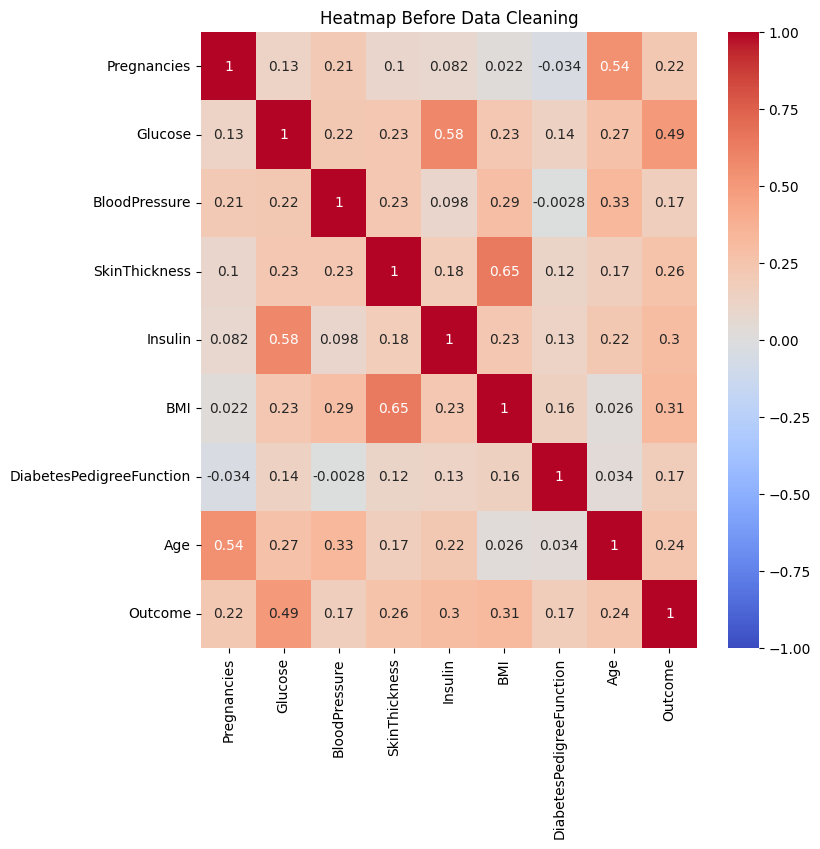

In [67]:
# Step 4: Calculate Pearson's Correlation Coefficient and plot heatmap
# Heatmap before cleaning
plt.figure(figsize=(8, 8))
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Before Data Cleaning')
plt.show()

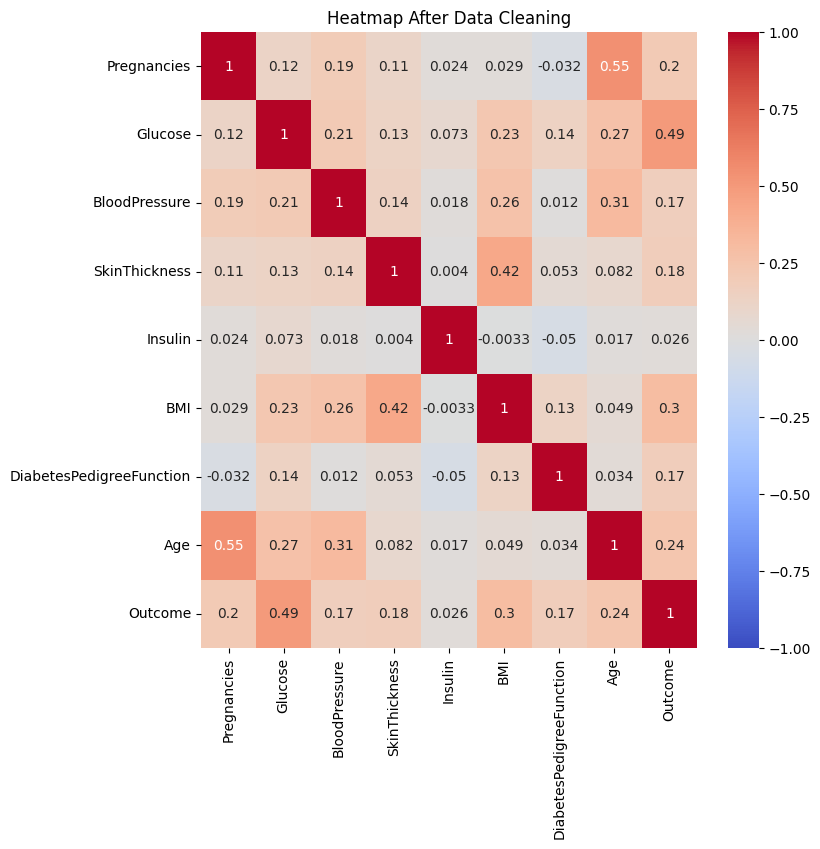

In [68]:
# Heatmap after cleaning
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap After Data Cleaning')
plt.show()

In [69]:
# Step 5: Select Features and Target
X = df.drop(columns=['Outcome'])  # Features (all except target)
y = df['Outcome']                # Target (Outcome variable)

In [70]:
# Step 6: Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Step 7: Split the dataset (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [72]:
# Step 7: Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Step 8: Perform 10-fold cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')

# Step 9: Print the cross-validation results
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation: ", cv_scores.std())

Cross-Validation Accuracy Scores:  [0.72727273 0.77922078 0.7012987  0.7012987  0.7012987  0.7012987
 0.74025974 0.77922078 0.73684211 0.80263158]
Mean Accuracy:  0.7370642515379358
Standard Deviation:  0.03616110183111129


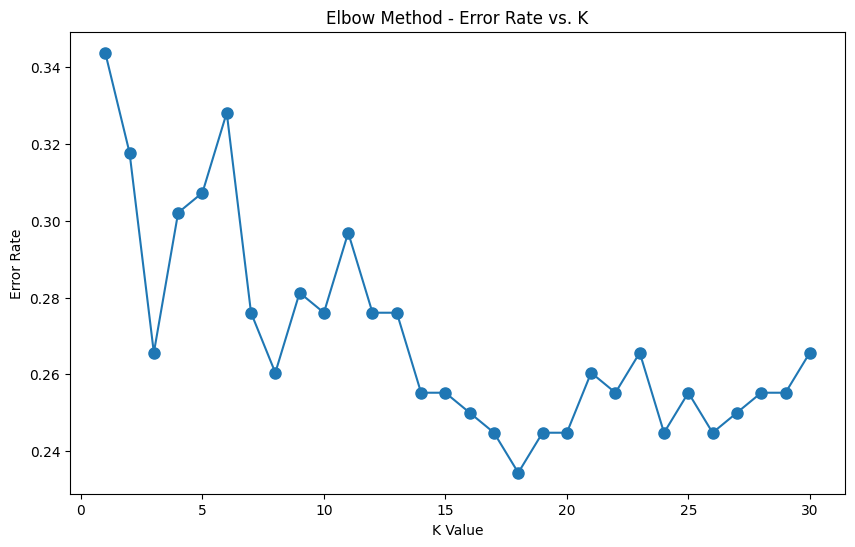

Best K value based on Elbow Method: 18


In [73]:
# Step 8: Find the best k using Elbow Method
error_rate = []
k_range = range(1, 31)  # We will try k values from 1 to 30

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

# Plot the error rate against K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, marker='o', markersize=8)
plt.title('Elbow Method - Error Rate vs. K')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

# Choose the best K value (lowest error rate)
best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K value based on Elbow Method: {best_k}")

In [74]:
# Step 9: Train KNN classifier with the best K value and Euclidean distance
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [75]:
# Step 10: Calculate the correlation matrix
corr = df.corr()

# Select the three best attributes based on their absolute correlation with the target variable 'Outcome'
best_attributes = corr['Outcome'].abs().sort_values(ascending=False).index[1:4]  # Skip the first one since it is 'Outcome' itself

# Print the top 3 best attributes with their correlation values
print("Top 3 Best Attributes with their Correlation to 'Outcome':")
for attribute in best_attributes:
    print(f"{attribute}: {corr['Outcome'][attribute]}")

# Print the correlation of all attributes with 'Outcome'
print("\nCorrelation of all Attributes with 'Outcome':")
for attribute in corr.columns:
    if attribute != 'Outcome':
        print(f"{attribute}: {corr['Outcome'][attribute]}")


Top 3 Best Attributes with their Correlation to 'Outcome':
Glucose: 0.4927824039150268
BMI: 0.30079332747173926
Age: 0.23835598302719757

Correlation of all Attributes with 'Outcome':
Pregnancies: 0.20436170382416227
Glucose: 0.4927824039150268
BloodPressure: 0.16684377988518886
SkinThickness: 0.17850542065495587
Insulin: 0.026280291130173473
BMI: 0.30079332747173926
DiabetesPedigreeFunction: 0.17384406565296004
Age: 0.23835598302719757


In [76]:
# Step 11: Test the classifier with three different K values and record results
k_values = [best_k+1, best_k + 3, best_k + 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nK = {k}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


K = 19
Confusion Matrix:
 [[105  18]
 [ 29  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       123
           1       0.69      0.58      0.63        69

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192

Accuracy: 0.7552083333333334

K = 21
Confusion Matrix:
 [[104  19]
 [ 31  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.67      0.55      0.60        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192

Accuracy: 0.7395833333333334

K = 23
Confusion Matrix:
 [[104  19]
 [ 32  37]]
Classification Report:
               precision    recall  f1-score   support

           

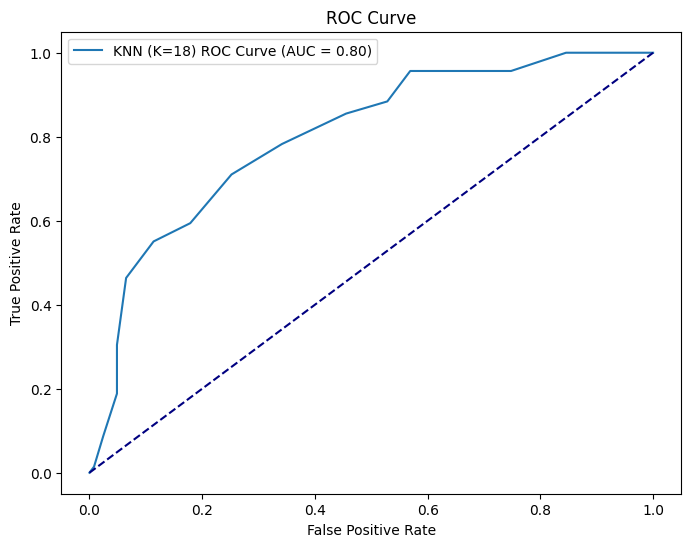

In [77]:
# Step 12: Plot the ROC Curve for the best K value
y_pred_proba = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (K={best_k}) ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
# Step 13: Calculate and print confusion matrix, classification report
print(f"Confusion Matrix (K={best_k+1}):\n", confusion_matrix(y_test, y_pred))
print(f"Classification Report (K={best_k+1}):\n", classification_report(y_test, y_pred))

Confusion Matrix (K=19):
 [[104  19]
 [ 32  37]]
Classification Report (K=19):
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       123
           1       0.66      0.54      0.59        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



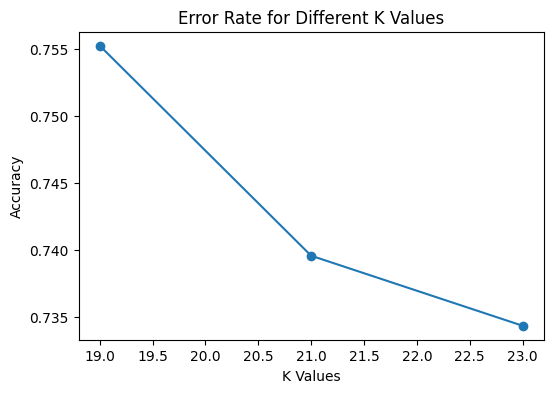

In [79]:
# Plot error rate vs K value for the 3 selected K values
plt.figure(figsize=(6, 4))
plt.plot(k_values, [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) for k in k_values], marker='o')
plt.title('Error Rate for Different K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

# Report generation:

1. Nearest Neighbors Method Explanation:
   - KNN works by calculating the distance between a new point and its nearest neighbors in the dataset.
   - The K value determines how many neighbors are used to make a prediction.
   
2. Criteria for Attribute Selection:
   - Based on the highest correlation with the target variable (Outcome), we selected the top 3 attributes.
   
3. Pearson's Correlation Coefficient:
   - Measures the strength of a linear relationship between variables.
   - Strong correlations with the Outcome variable were identified and used for feature selection.
   
4. Interpret and Compare Results:
   - We compared K values to find the best model performance using the Elbow method.
   - The ROC curve was plotted for the best K value, showing the trade-off between sensitivity and specificity.